# PRCP-1009-CellphonePrice

## Problem Statement

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.


## Data fields
●	battery_power - Total energy a battery can store in one time measured in mAh\
●	blue - Has bluetooth or not\
●	clock_speed - speed at which microprocessor executes instructions\
●	dual_sim - Has dual sim support or not\
●	fc - Front Camera mega pixels\
●	four_g - Has 4G or not\
●	int_memory - Internal Memory in Gigabytes\
●	m_dep - Mobile Depth in cm\
●	mobile_wt - Weight of mobile phone\
●	n_cores - Number of cores of processor\
●	pc - Primary Camera mega pixels\
●	px_height - Pixel Resolution Height\
●	px_width - Pixel Resolution Width\
●	ram - Random Access Memory in Megabytes\
●	sc_h - Screen Height of mobile in cm\
●	sc_w - Screen Width of mobile in cm\
●	talk_time - longest time that a single battery charge will last when you are\
●	three_g - Has 3G or not\
●	touch_screen - Has touch screen or not\
●	wifi - Has wifi or not\
●	price_range - This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).\


# 1. Importing Libraries & Loading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\Project\Datamites Capstone Projects\PRCP-1009-CellphonePrice\Data\datasets_11167_15520_train.csv")
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# 2. Basic Check and Domain Analysis

In [3]:
df.info()

# dataset has only int and float dtypes with 2000 entries and 21 features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Key Inference 
1. battery_power : indicated the battery capacity of the model, ranging from 501 to 1998 mAh. The avergae battery capacity of the dataset is 1238 mAh.
2. clock_speed : Measured in GHz. The clock speed ranges from 0.5 to 3 GHz.
3. fc : front camera has 0 megapixels which is not possible for most of the cases. Need a proper daa check and debug, if necessary.
4. four_g : 52% of the mobile model has 4g technology.
5. int_memory : Internal memory ranges from 2 gb to 64gb.
6. mobile_wt : weight of the mobile ranges between 80g to 200g with average wight 140g.
7. n_cores : no. of cores ranges between 1 to 8 indicating presence of very low category and high end model.
8. pc : primary camera pixels 0 to 20. 0MP may be reflects that some of the models dont have back camera. Still proper data check requires here.
9. ram : RAM ranges from 256mb to 3998mb.
10. three_g : 76% of the models have 3G technology
11. touch_screen : 50% of the model have touch screen facility
12. wifi : 50% of the model have wifi technology
13. price range : price range is categorized in 1 - low , 2 - mid range and 3 - high end

# 3. EDA

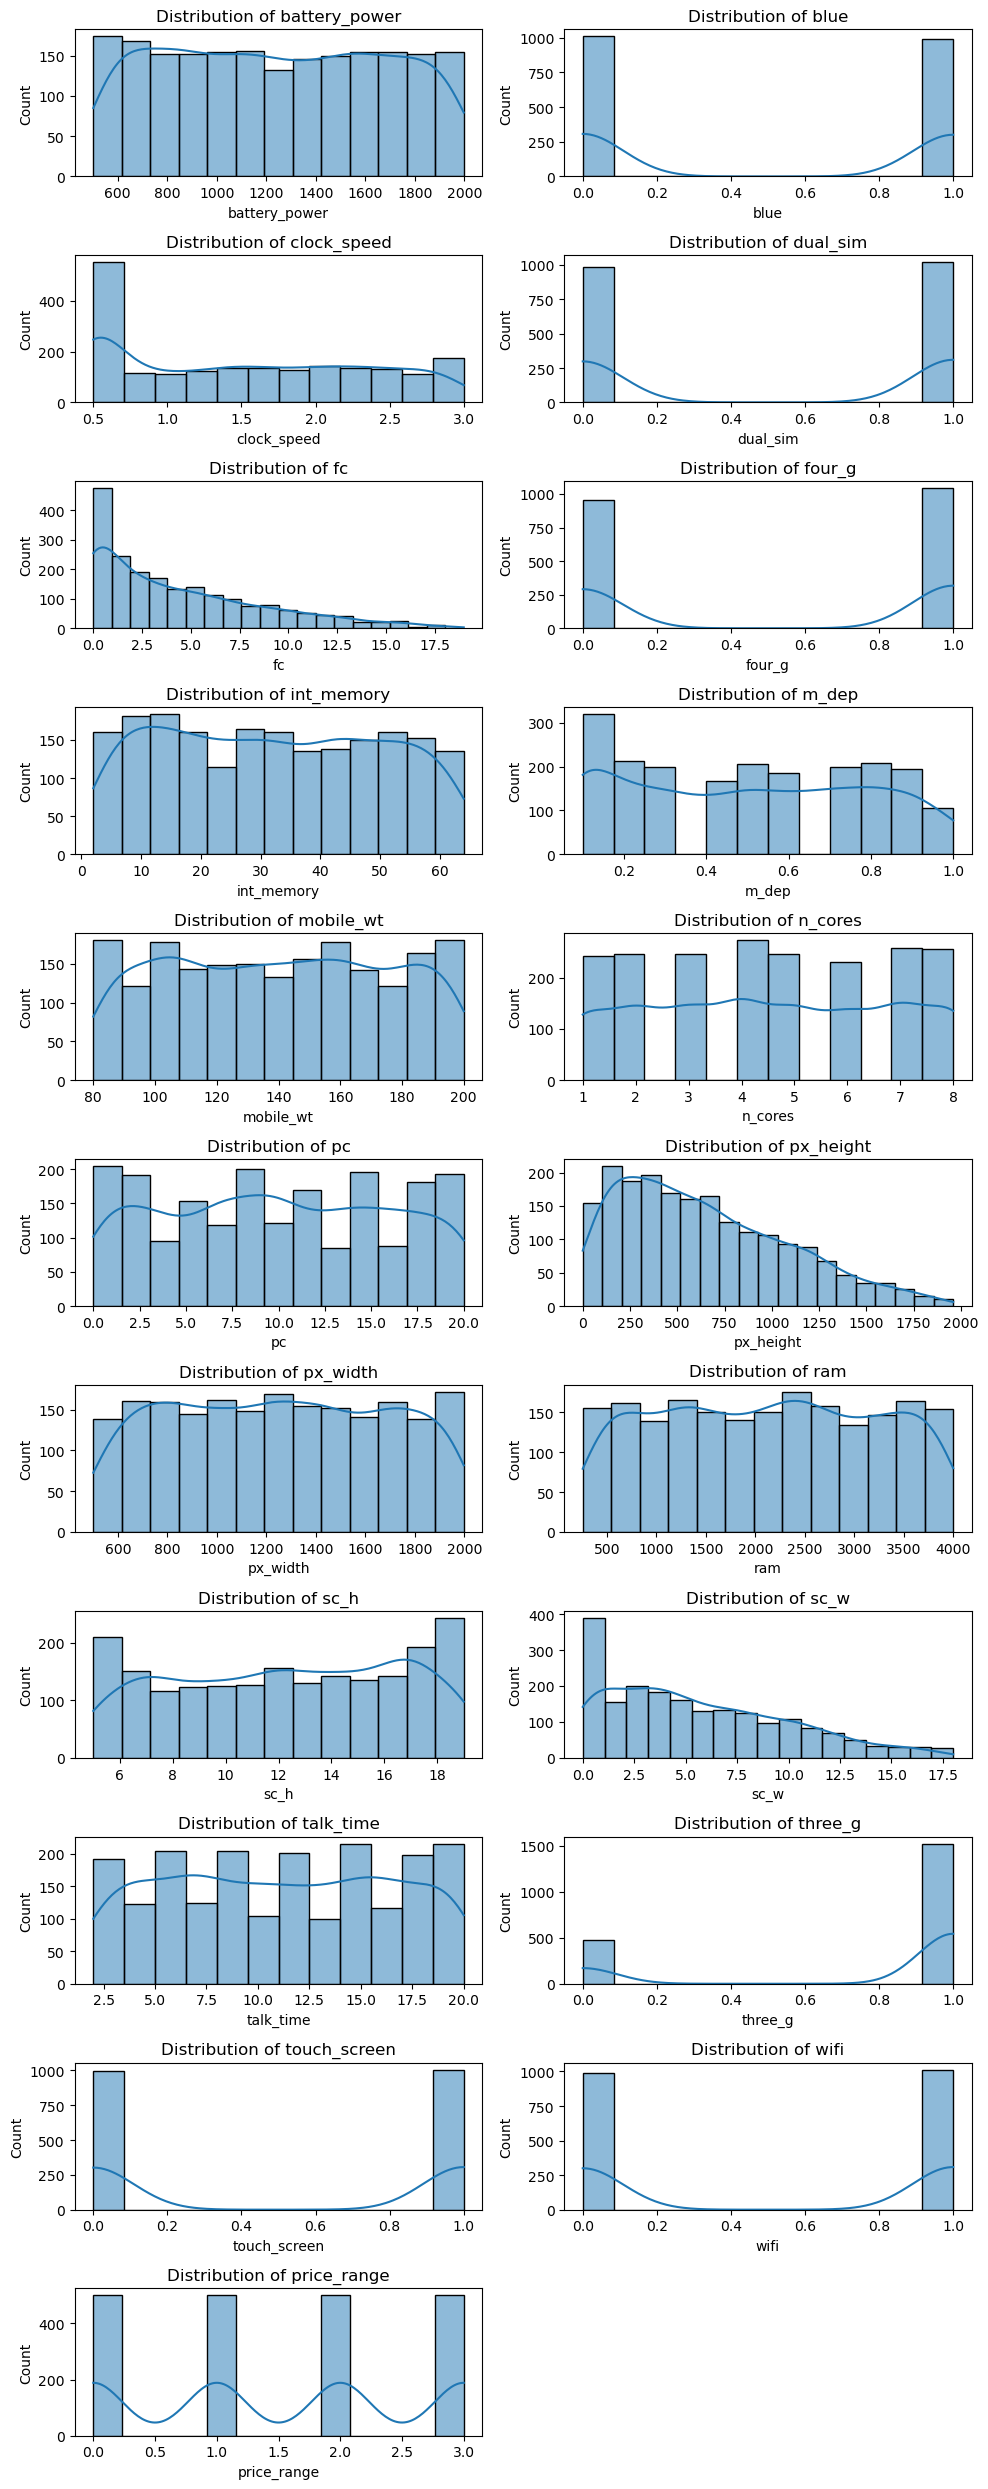

In [5]:
# Univariate Analysis

plt.figure(figsize=(10,25))
plotnumber = 1

for i in df:
    plt.subplot(11,2,plotnumber)
    sns.histplot(data=df, x = i, kde=True)
    plotnumber = plotnumber+1
    plt.title(f'Distribution of {i}')
plt.tight_layout()
plt.show()

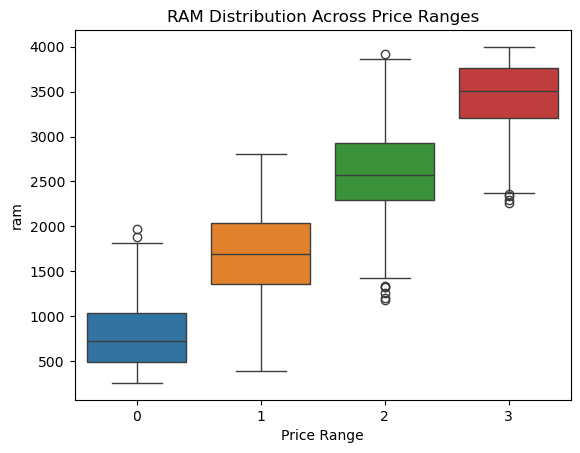

In [6]:
# Bivariate Analysis

#Price Range & RAM

sns.boxplot(x='price_range', y='ram', data=df, palette='tab10')
plt.title('RAM Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('ram')
plt.show()


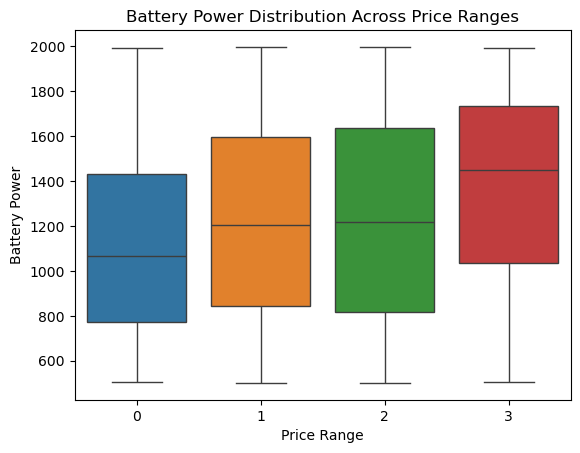

In [7]:
# Price Range and Battery Power

sns.boxplot(x='price_range', y='battery_power', data=df, palette='tab10')
plt.title('Battery Power Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()


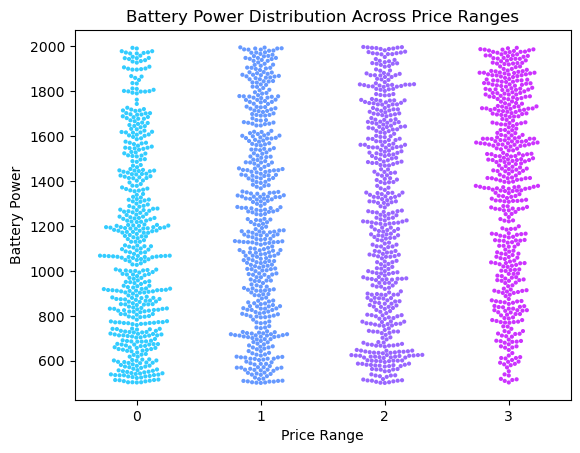

In [8]:
sns.swarmplot(x='price_range', y='battery_power', data=df, palette='cool', size=3)
plt.title('Battery Power Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Battery Power')
plt.show()


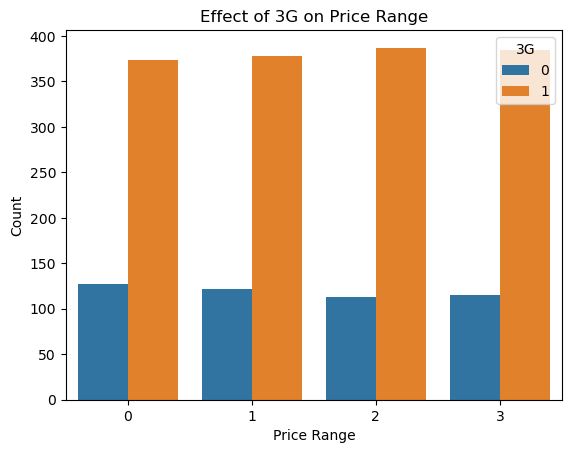

In [9]:
#price range with 3g models

sns.countplot(x='price_range', hue='three_g', data=df)
plt.title('Effect of 3G on Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='3G')
plt.show()

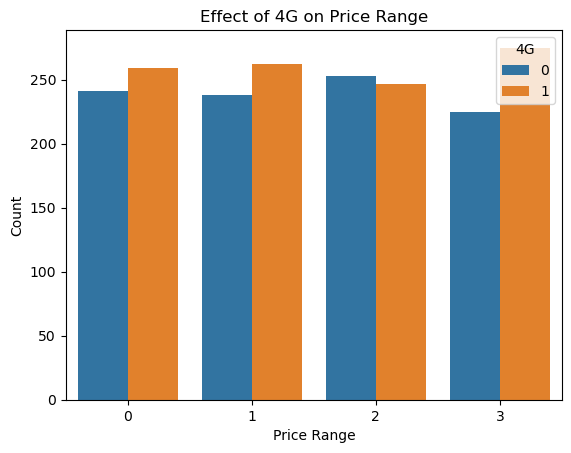

In [10]:
#price range with 4g

sns.countplot(x='price_range', hue='four_g', data=df)
plt.title('Effect of 4G on Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.legend(title='4G')
plt.show()

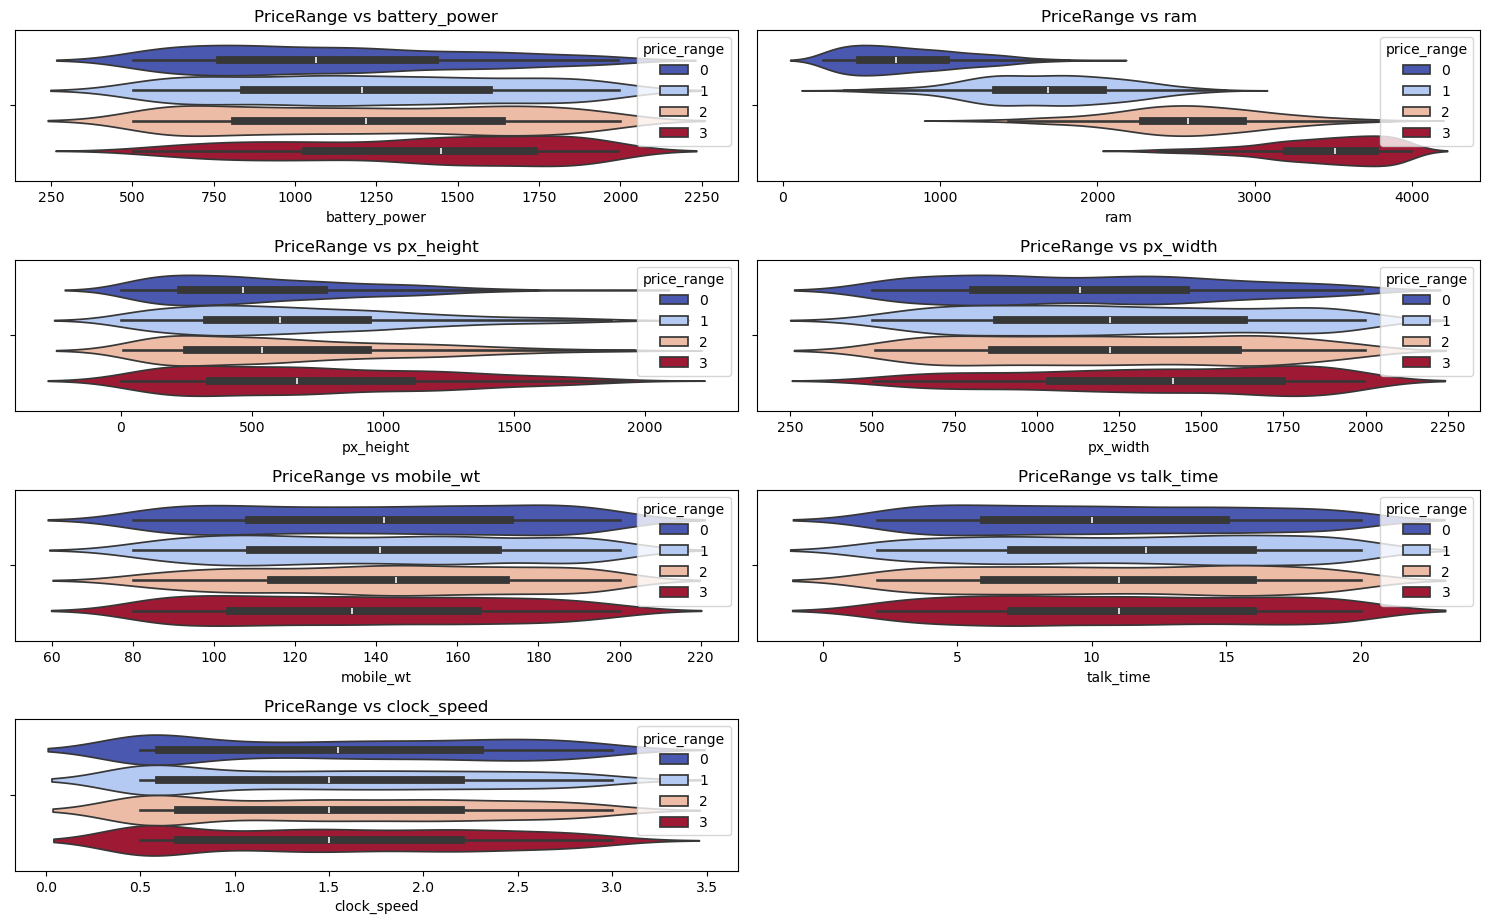

In [11]:
# 2. Bivariate Analysis

plt.figure(figsize=(15,25))
plotnumber = 1

features = ['battery_power', 'ram', 'px_height', 'px_width', 'mobile_wt', 'talk_time', 'clock_speed'] 

for i in features:
    plt.subplot(11,2,plotnumber)
    sns.violinplot(data=df, x=i, hue ='price_range', palette = 'coolwarm')
    plt.title(f'PriceRange vs {i}')
    plotnumber = plotnumber+1

plt.tight_layout()
plt.show()
    

<Axes: >

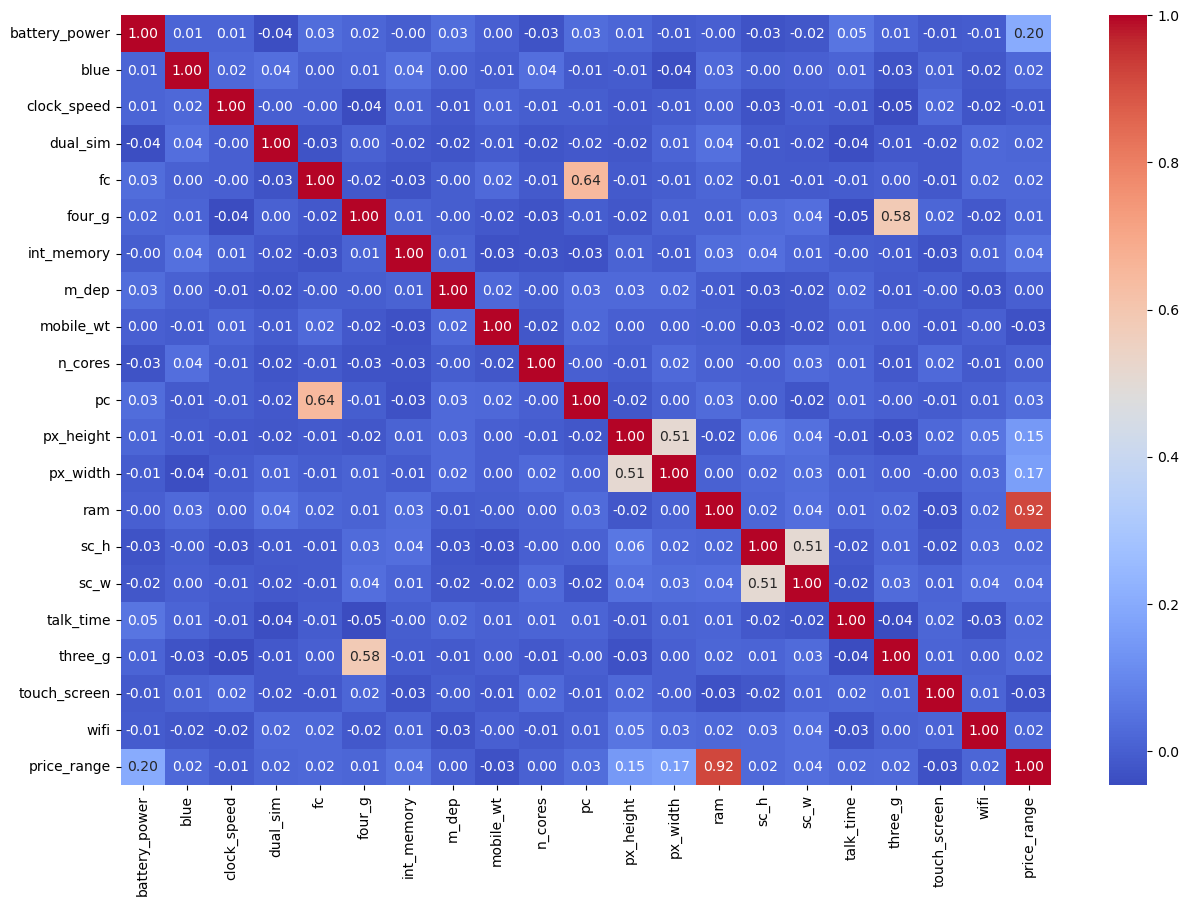

In [12]:
# 3. Multivariate Analysis

plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Feature Importance Check

<Axes: title={'center': 'Correlation with target'}>

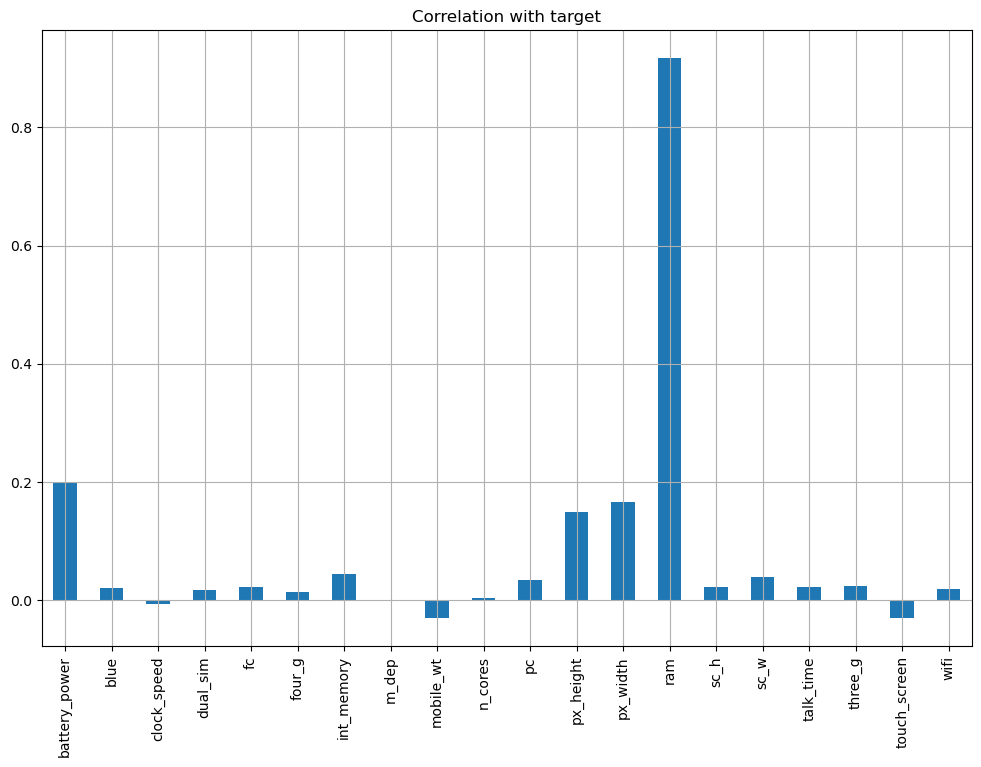

In [13]:
df.drop('price_range', axis=1).corrwith(df.price_range).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

# 4. Data Preprocessing

In [14]:
# a) Null Check

df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [15]:
# b) Duplicate Check 

df.duplicated().sum()

0

In [16]:
# c) SMOTE

df['price_range'].value_counts()

#. SMOTE is not required since the target is equally balanced.

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [17]:
# d) Encoding

#Encoding not required, since there is not categorical features

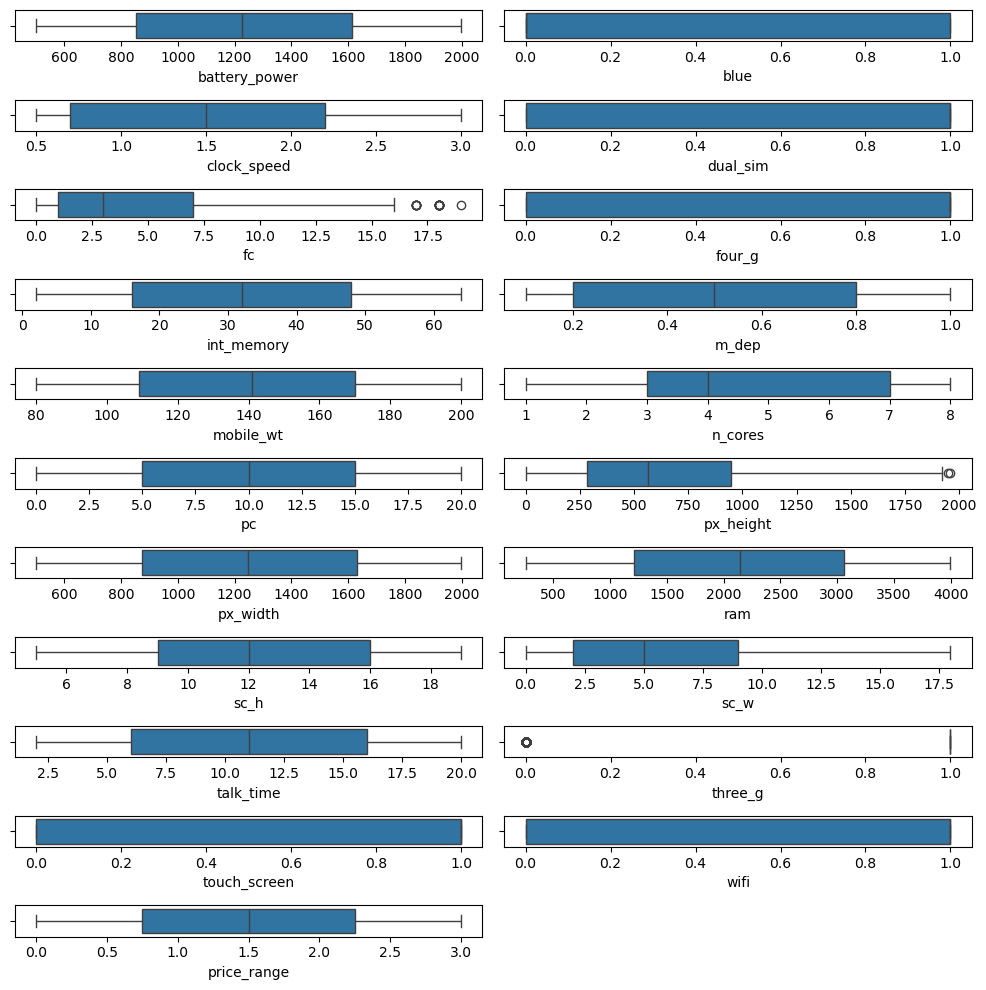

In [18]:
# 5) Handling Outliers

plt.figure(figsize=(10,10))
plotnumber = 1

for col in df:
    plt.subplot(11,2,plotnumber)
    sns.boxplot(x=df[col])
    plotnumber +=1
plt.tight_layout()
plt.show()


# since outlier presence is very small , we ignore handling the outliers

# 5. Model Building

In [19]:
# pip install xgboost

In [20]:
X = df.iloc[0:,:-1]
y = df['price_range']

In [21]:
# X & y Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 42)

In [22]:
#Scaling only for independant  features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [23]:
#importing model libraries & hypertuning library

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import GridSearchCV 

In [24]:
# Importing evalution metrics

from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score, confusion_matrix

In [25]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# 1. Logistic Regression

In [26]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test,y_pred_lr)
acc_lr

0.95

In [28]:
# Hypertuning for Logistic Regresion

param_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(), param_lr, cv=5, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

y_pred_lr_hyp = best_lr.predict(X_test)


acc_lr_hyp = accuracy_score(y_test,y_pred_lr_hyp)
acc_lr_hyp

0.96

In [29]:
# train accuracy
y_pred_train_lr = lr.predict(X_train)
acc_lr_train = accuracy_score(y_train, y_pred_train_lr)
acc_lr_train


0.975625

# 2. Gradient Boosting 

In [30]:
gbm = GradientBoostingClassifier(random_state = 42)

gbm.fit(X_train,y_train)


GradientBoostingClassifier(random_state=42)

In [31]:
y_pred_gbm = gbm.predict(X_test)
acc_gbm = accuracy_score(y_test,y_pred_gbm)
acc_gbm

0.9025

In [32]:
# Hypertuning for Gradient Boosing

param_gbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_gbm = GridSearchCV(GradientBoostingClassifier(), param_gbm, cv=5, scoring='accuracy', n_jobs=-1)
grid_gbm.fit(X_train, y_train)
best_gbm = grid_gbm.best_estimator_

y_pred_gbm_hyp = best_gbm.predict(X_test) 


acc_gbm_hyp = accuracy_score(y_test,y_pred_gbm_hyp)
acc_gbm_hyp

0.915

In [33]:
# train accuracy
y_pred_train_gbm = gbm.predict(X_train)
acc_gbm_train = accuracy_score(y_train, y_pred_train_gbm)
acc_gbm_train


0.999375

# 3. Random Forest Classifier

In [34]:
rf = RandomForestClassifier()

rf.fit(X_train,y_train)

RandomForestClassifier()

In [35]:
y_pred_rf = rf.predict(X_test)

acc_rf = accuracy_score(y_test,y_pred_rf)
cm_rf = confusion_matrix(y_test,y_pred_rf)

print('Accuracy :',acc_rf)
print('Confusion Matric :', cm_rf)

Accuracy : 0.88
Confusion Matric : [[101   4   0   0]
 [  6  80   5   0]
 [  0  11  75   6]
 [  0   0  16  96]]


In [36]:
# Hypertuning for RandomForest Classifier

param_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestClassifier(), param_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

y_pred_rf_hyp = best_rf.predict(X_test)

acc_rf_hyp = accuracy_score(y_test,y_pred_rf_hyp)
acc_rf_hyp


0.8725

In [37]:
# train accuracy
y_pred_train_rf = rf.predict(X_train)
acc_rf_train = accuracy_score(y_train, y_pred_train_rf)
acc_rf_train


1.0

# 4. XGBoost

In [38]:
xgb = XGBClassifier()

xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test,y_pred_xgb)
cm_xgb = confusion_matrix(y_test,y_pred_xgb)

print(acc_xgb)
print(cm_xgb)

0.905
[[102   3   0   0]
 [  5  86   0   0]
 [  0   7  79   6]
 [  0   0  17  95]]


In [40]:
param_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}
grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)
best_xgb = grid_xgb.best_estimator_

y_pred_xgb_hyp = best_xgb.predict(X_test)

acc_xgb_hyp = accuracy_score(y_test, y_pred_xgb_hyp)
acc_xgb_hyp

0.9225

In [41]:
# train accuracy
y_pred_train_xgb = xgb.predict(X_train)
acc_xgb_train = accuracy_score(y_train, y_pred_train_xgb)
acc_xgb_train


1.0

# 5. SVC

In [42]:
svc = SVC()

svc.fit(X_train,y_train)

SVC()

In [43]:
y_pred_svc = svc.predict(X_test)

acc_svc = accuracy_score(y_test,y_pred_svc)
cm_svc = confusion_matrix(y_test, y_pred_svc)

print(acc_svc)
print(cm_svc)

0.8825
[[100   5   0   0]
 [  8  81   2   0]
 [  0  14  74   4]
 [  0   0  14  98]]


In [44]:
param_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_svc = GridSearchCV(SVC(), param_svc, cv=5, scoring='accuracy', n_jobs=-1)
grid_svc.fit(X_train, y_train)
best_svc = grid_svc.best_estimator_

y_pred_svc_hyp = best_svc.predict(X_test)

acc_svc_hyp = accuracy_score(y_test,y_pred_svc_hyp)
acc_svc_hyp

0.945

In [45]:
# train accuracy
y_pred_train_svc = svc.predict(X_train)
acc_svc_train = accuracy_score(y_train, y_pred_train_svc)
acc_svc_train


0.983125

# 6. Decision Tree

In [46]:
dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test,y_pred_dt)
cm_dt = confusion_matrix(y_test,y_pred_dt)

print(acc_dt)
print(cm_dt)

0.8275
[[92 13  0  0]
 [ 8 80  3  0]
 [ 0 19 63 10]
 [ 0  1 15 96]]


In [48]:
param_dt = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

y_pred_dt_hyp = best_dt.predict(X_test)

acc_dt_hyp = accuracy_score(y_test,y_pred_dt_hyp)
acc_dt_hyp

0.825

In [49]:
# train accuracy
y_pred_train_dt = dt.predict(X_train)
acc_dt_train = accuracy_score(y_train, y_pred_train_dt)
acc_dt_train


1.0

# 7. KNN

In [50]:
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [51]:
y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test,y_pred_knn)

print(acc_knn)
print(cm_knn)

0.5725
[[79 24  2  0]
 [28 43 17  3]
 [ 5 31 43 13]
 [ 0  5 43 64]]


In [52]:
param_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_

y_pred_knn_hyp = best_knn.predict(X_test)

acc_knn_hyp = accuracy_score(y_test,y_pred_knn_hyp)
acc_knn_hyp

0.5975

In [53]:
# train accuracy
y_pred_train_knn = knn.predict(X_train)
acc_knn_train = accuracy_score(y_train, y_pred_train_knn)
acc_knn_train


0.69625

In [54]:
y_pred_knn

array([0, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 3, 2, 2, 2, 3, 1, 0, 0, 3,
       0, 1, 0, 1, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 2, 0, 3, 0, 2, 3, 3, 0,
       2, 1, 1, 0, 3, 1, 3, 0, 1, 0, 0, 2, 1, 3, 0, 0, 1, 2, 2, 0, 0, 0,
       2, 3, 2, 1, 0, 3, 0, 1, 2, 0, 0, 3, 2, 2, 3, 0, 1, 1, 0, 3, 1, 2,
       3, 0, 2, 3, 3, 1, 3, 2, 2, 3, 1, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 2, 1, 3, 2, 3, 2, 0, 2, 0, 1, 3, 1, 3, 1, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 3, 1, 1, 1, 1, 1, 0, 3, 1, 1, 0, 1, 1, 1, 2, 3, 0, 2, 0,
       2, 2, 0, 2, 0, 1, 3, 3, 3, 3, 1, 1, 2, 2, 2, 3, 2, 1, 1, 0, 3, 1,
       0, 2, 1, 0, 0, 0, 0, 0, 2, 3, 1, 2, 0, 1, 0, 0, 1, 3, 2, 3, 0, 0,
       1, 0, 2, 1, 1, 3, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 0, 1,
       2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 2, 0, 1, 2, 2, 1, 0, 3, 2, 0, 2, 3,
       2, 3, 1, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 2, 3, 2, 2, 3, 3, 0, 3, 1,
       2, 0, 2, 0, 1, 3, 2, 3, 2, 2, 0, 1, 1, 1, 2, 1, 2, 0, 0, 3, 1, 3,
       0, 0, 3, 0, 2, 1, 3, 2, 2, 1, 0, 1, 1, 3, 3,

In [55]:
#pca

from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Reduce to 10 important features
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [56]:
knn.fit(X_train_pca,y_train)

KNeighborsClassifier(n_neighbors=20)

In [57]:
y_pred_knn_pca = knn.predict(X_test_pca)

acc_knn_pca = accuracy_score(y_test,y_pred_knn_pca)
acc_knn_pca

0.4025

### Even after pca, the accuracy is falling. 
### So KNN is the not best model to choose for this project.

# 8. ANN

In [58]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier()
ann.fit(X_train,y_train)

MLPClassifier()

In [59]:
y_pred_ann = ann.predict(X_test)

acc_ann = accuracy_score(y_test,y_pred_ann)
cm_ann = confusion_matrix(y_test,y_pred_ann)

print(acc_ann)
print(cm_ann)

0.92
[[ 98   7   0   0]
 [  3  88   0   0]
 [  0   9  79   4]
 [  0   0   9 103]]


In [60]:
# Hypertuning for ANN

param_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd']
}
grid_ann = GridSearchCV(MLPClassifier(max_iter=500), param_ann, cv=5, scoring='accuracy', n_jobs=-1)
grid_ann.fit(X_train, y_train)
best_ann = grid_ann.best_estimator_

y_pred_ann_hyp = best_ann.predict(X_test)

acc_ann_hyp = accuracy_score(y_test,y_pred_ann_hyp)
acc_ann_hyp

0.965

In [61]:
# train accuracy
y_pred_train_ann = ann.predict(X_train)
acc_ann_train = accuracy_score(y_train, y_pred_train_ann)
acc_ann_train


0.999375

models = {
    "Logistic Regression": lr,
    "Gradient Boosting": gbm,
    "Random Forest": rf,
    "XGBoost": xgb,
    "Support Vector Machine": svc,
    "Decision Tree": dt,
    "K-Nearest Neighbors": knn,
    "Artificial Neural Network": ann
}

plt.figure(figsize=(16, 12))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)  #  model predictions
    cm = confusion_matrix(y_test, y_pred)  # confusion matrix

    plt.subplot(3, 3, i + 1)  
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low','Medium','High','Very High'], yticklabels=['Low','Medium','High','Very High'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {name}")

plt.tight_layout()
plt.show()


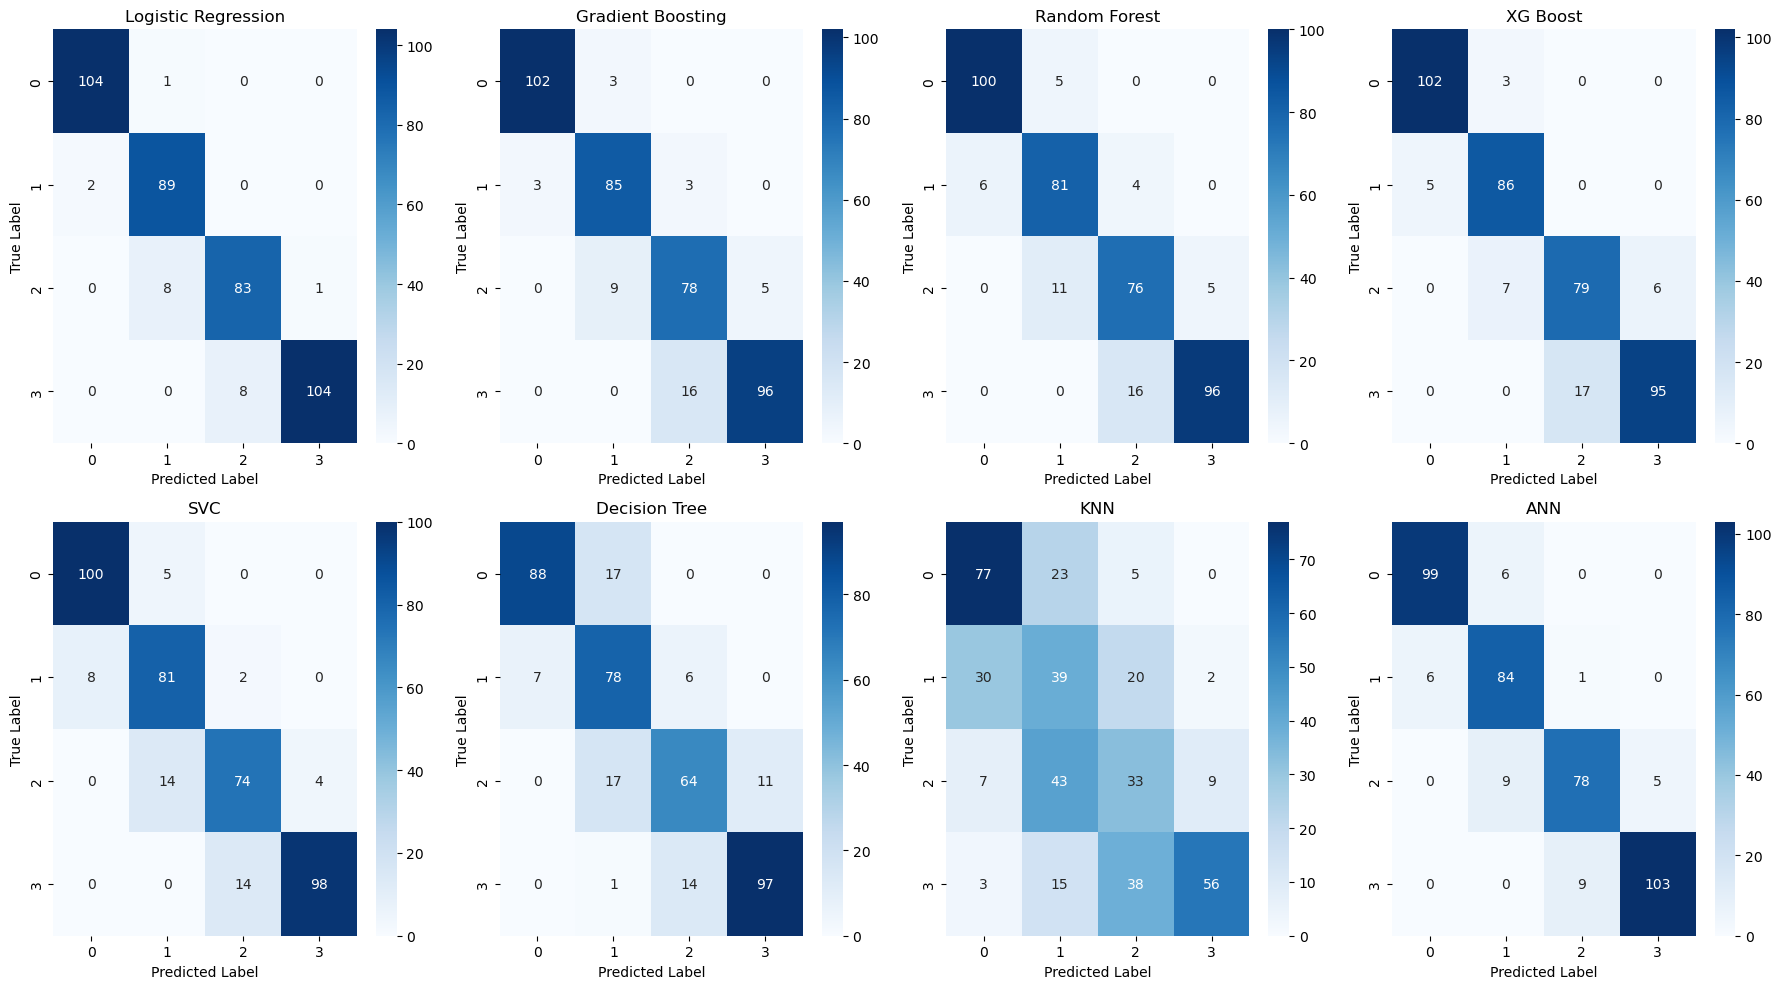

In [62]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XG Boost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "SVC": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "ANN": MLPClassifier(max_iter=1000)
}

# Set up subplots for confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(18, 10))  # 2 rows, 4 columns
axes = axes.ravel()  # Flatten axes array for easy iteration

# Loop through models, train, predict, and plot confusion matrices
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(name)
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [63]:
Result = pd.DataFrame({
    'Model': ['Logistic Regression','Gradient Boosting','Random Forest','XG Boost','SVC','Decision Tree','KNN','ANN'],
    'Train Accuracy': [acc_lr_train, acc_gbm_train, acc_rf_train, acc_xgb_train, acc_svc_train, acc_dt_train, acc_knn_train, acc_ann_train],
    'Test Accuracy' : [acc_lr, acc_gbm, acc_rf, acc_xgb, acc_svc, acc_dt, acc_knn, acc_ann],
    'Tuned Accuracy' : [acc_lr_hyp, acc_gbm_hyp, acc_rf_hyp, acc_xgb_hyp, acc_svc_hyp, acc_dt_hyp, acc_knn_hyp, acc_ann_hyp],
    
    'F1 Score' : [ f1_score(y_test, y_pred_lr, average='weighted'), f1_score(y_test, y_pred_gbm, average='weighted'),
    f1_score(y_test, y_pred_rf, average='weighted'), f1_score(y_test, y_pred_xgb, average='weighted'),
    f1_score(y_test, y_pred_svc, average='weighted'), f1_score(y_test, y_pred_dt, average='weighted'),
    f1_score(y_test, y_pred_knn, average='weighted'), f1_score(y_test, y_pred_ann, average='weighted') ],
    
    'Precision' : [ 
        precision_score(y_test,y_pred_lr, average='weighted'), 
        precision_score(y_test,y_pred_gbm, average='weighted'),
        precision_score(y_test,y_pred_rf, average='weighted'),
        precision_score(y_test,y_pred_xgb, average='weighted'), 
        precision_score(y_test,y_pred_svc, average='weighted'),
        precision_score(y_test,y_pred_dt, average='weighted'),
        precision_score(y_test,y_pred_knn, average='weighted'), 
        precision_score(y_test,y_pred_ann, average='weighted')
    ],  

    'Recall' : [ 
        recall_score(y_test,y_pred_lr, average='weighted'), 
        recall_score(y_test,y_pred_gbm, average='weighted'), 
        recall_score(y_test,y_pred_rf, average='weighted'),
        recall_score(y_test,y_pred_xgb, average='weighted'),
        recall_score(y_test,y_pred_svc, average='weighted'), 
        recall_score(y_test,y_pred_dt, average='weighted'),
        recall_score(y_test,y_pred_knn, average='weighted'), 
        recall_score(y_test,y_pred_ann, average='weighted')
    ]  
})

Result

,Model,Train Accuracy,Test Accuracy,Tuned Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.975625,0.9500,0.9600,0.950048,0.951268,0.9500
1,Gradient Boosting,0.999375,0.9025,0.9150,0.902954,0.905443,0.9025
2,Random Forest,1.000000,0.8800,0.8725,0.880542,0.882576,0.8800
3,XG Boost,1.000000,0.9050,0.9225,0.904909,0.906673,0.9050
4,SVC,0.983125,0.8825,0.9450,0.882919,0.885461,0.8825
5,Decision Tree,1.000000,0.8275,0.8250,0.828161,0.835036,0.8275
6,KNN,0.696250,0.5725,0.5975,0.579052,0.598322,0.5725
7,ANN,0.999375,0.9200,0.9650,0.920358,0.923213,0.9200


# Evaluating the models with K-Fold Cross-Validation

In [69]:
from sklearn.model_selection import cross_val_score

# Running 10-fold cross-validation
cv_scores_lr = cross_val_score(lr, X, y, cv=10, scoring='accuracy')

# average accuracy and standard deviation
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")


Logistic Regression CV Accuracy: 0.6400 ± 0.0266


In [71]:
# average accuracy and standard deviation
print(f"Logistic Regression CV Accuracy: {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")

Logistic Regression CV Accuracy: 0.6400 ± 0.0266


In [70]:
cv_scores_gbm = cross_val_score(gbm, X, y, cv=10, scoring='accuracy')

print(f"Gradient Boosting CV Accuracy: {cv_scores_gbm.mean():.4f} ± {cv_scores_gbm.std():.4f}")


Gradient Boosting CV Accuracy: 0.9115 ± 0.0179


In [66]:
# Feature Importance


feature_names = df.columns[:-1]  #  original DataFrame before splitting

feature_importance = gbm.feature_importances_   #feature importance from the trained GBM model

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})   #creating df 

feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)   # Sorting by importance



print(feat_imp_df)


          Feature  Importance
13            ram    0.791936
0   battery_power    0.110628
11      px_height    0.053549
12       px_width    0.025648
8       mobile_wt    0.005609
6      int_memory    0.003454
7           m_dep    0.002048
4              fc    0.001530
14           sc_h    0.001116
15           sc_w    0.001095
16      talk_time    0.000965
9         n_cores    0.000729
10             pc    0.000495
2     clock_speed    0.000373
19           wifi    0.000354
5          four_g    0.000148
3        dual_sim    0.000147
18   touch_screen    0.000097
17        three_g    0.000057
1            blue    0.000020


### Takeaway from the GBM Model's Features

1. The most important feature is RAM with 77.5%
2. Pixel height & Width and Battery power are next
3. screen height&width, mobile weight shows less contributions
4. Bluetooth and 3g, multiple SIM and touch screen are not very important.5. 

# Conclusion

1. Logistic Regression : This model shows strong performance with few misclassifications but cv score is much lesser 64% only. 
This is due to overfitting on the training data and failing on unseen data.
2. Gradient Boosting : This model also shows strong performance with high accuracy score, precision and f1 score and Cv is also above 90%. But itt misclassifies some medium and high category mobile models.
3. Random Forest Classifier : The training accuracy is 100% but test accuracy drops to 89% showing overfitting. Also, it misclassifies lot of medium and high class mobile models.
4. XGBoost Classifier : This model also shows overfitting but slightly less than Random Forest.
5. SVC : This model almost as same as XGBoost but with low recall score.
6. Decision Tree : It shows high overfitting, misclassification.
7. KNN : It is the least effective model for this project with low accuracy and other scores. Also, it misclassifies every segment.
8. ANN : Performs well and in par with Logistic Regression.

# Suggestion to the Bob

1. With the report of confusion matirx and test result, Bob has to implement Gradient Boosting Classifier to effectively price his mobile models.
2. He should also train the model with some additional data which may increase the accuracy level which in turn helps in to price his products.